In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\SQLDATA\\Dataset\\Sales_Data.csv")

In [3]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [5]:
df.isna().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(int)

In [7]:
df.shape

(185950, 11)

In [8]:
df['total_doanhthu'] = df['Quantity Ordered'] * df['Price Each']

In [9]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,total_doanhthu
0,0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1700
1,1,295666,LG Washing Machine,1,600,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,600
2,2,295667,USB-C Charging Cable,1,11,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,11
3,3,295668,27in FHD Monitor,1,149,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,149
4,4,295669,USB-C Charging Cable,1,11,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,11


# Phân tích doanh thu theo tháng

In [34]:
data_2019 = df['Order Date'].dt.year == 2019
data_2019 = df[df['Order Date'].dt.year == 2019].copy()
data_2019['Month'] = data_2019['Order Date'].dt.month
total_data_2019 = data_2019.groupby('Month')['total_doanhthu'].sum().reset_index()

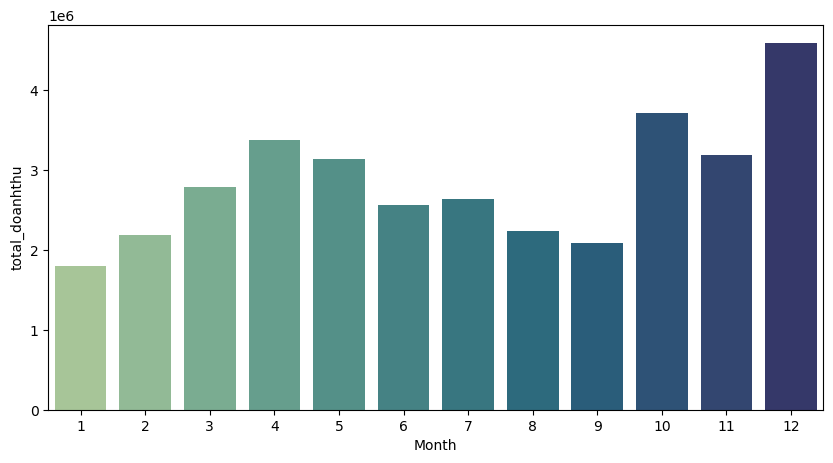

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(data=total_data_2019, x='Month', y='total_doanhthu',palette='crest', hue='Month', legend=False);

# Top sản phẩm bán chạy

In [91]:
top_sp = df.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values(by='Quantity Ordered', ascending = False).head(10)

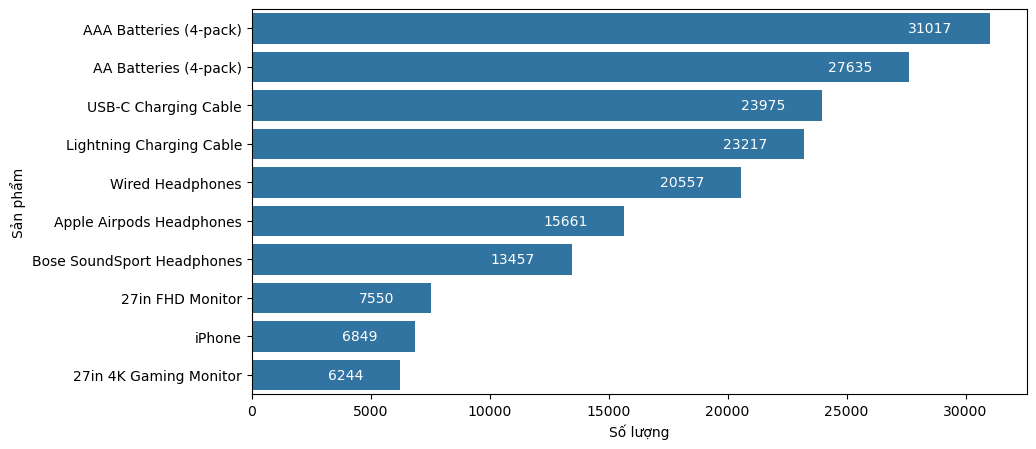

In [115]:
plt.figure(figsize=(10,5))
plt.xlabel("Số lượng")
plt.ylabel("Sản phẩm")
sns.barplot(data=top_sp, x='Quantity Ordered', y='Product')
for i in range(len(top_sp)):
    quantity = top_sp.iloc[i]['Quantity Ordered']
    plt.text(
        quantity - max(top_sp['Quantity Ordered'])*0.05,  # hơi lùi vào trong cột
        i,                                                # vị trí dòng (theo y)
        str(int(quantity)),                               # giá trị
        va='center', ha='right',                          # canh phải, giữa
        color='white', fontsize=10
    )


# Khu vực bán chạy nhất

In [116]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,total_doanhthu
0,0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1700
1,1,295666,LG Washing Machine,1,600,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,600
2,2,295667,USB-C Charging Cable,1,11,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,11
3,3,295668,27in FHD Monitor,1,149,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,149
4,4,295669,USB-C Charging Cable,1,11,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,11


In [129]:
df_area = df.groupby('City')['Quantity Ordered'].sum().reset_index().sort_values(by='Quantity Ordered', ascending=False)

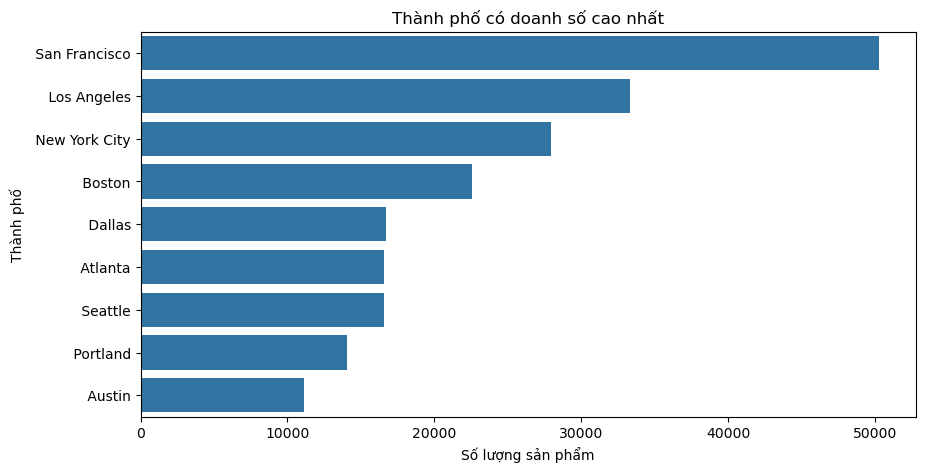

In [148]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df_area, x='Quantity Ordered', y='City')
ax.set(title="Thành phố có doanh số cao nhất", xlabel="Số lượng sản phẩm", ylabel='Thành phố');

# So sánh doanh thu tăng giảm theo tháng

In [165]:
data_2019 = df['Order Date'].dt.year == 2019
data_2019 = df[df['Order Date'].dt.year == 2019].copy()
data_2019['Month'] = data_2019['Order Date'].dt.month
total_data_2019['pct_change'] = total_data_2019['total_doanhthu'].pct_change() * 100


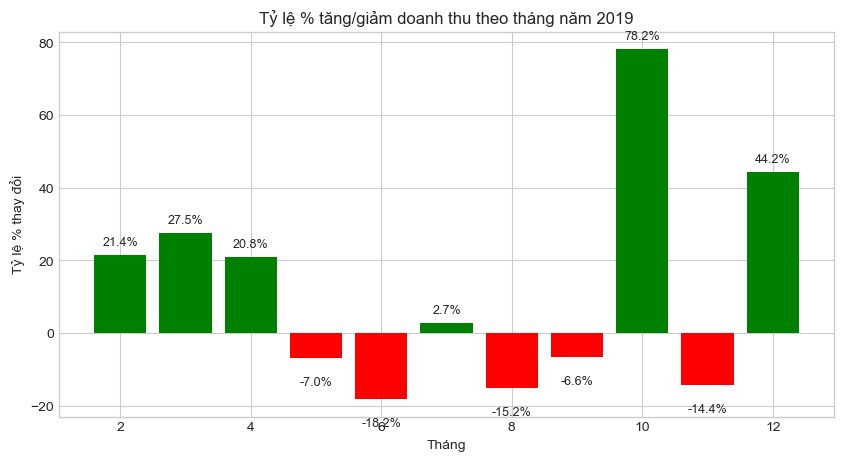

In [175]:
fig, ax = plt.subplots(figsize=(10,5))

colors = ['green' if val >= 0 else 'red' for val in total_data_2019['pct_change']]
bars = ax.bar(total_data_2019['Month'], total_data_2019['pct_change'], color=colors)

# Ghi giá trị %
for idx, val in enumerate(total_data_2019['pct_change']):
    if pd.notnull(val):
        ax.text(idx + 1, val + (2 if val >= 0 else -5), f'{val:.1f}%', 
                ha='center', va='bottom' if val >= 0 else 'top', fontsize=9)
ax.set(title="Tỷ lệ % tăng/giảm doanh thu theo tháng năm 2019",
       xlabel="Tháng",
       ylabel="Tỷ lệ % thay đổi");